In [44]:
import pylidc as pl
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as manim
from skimage.measure import find_contours
from pylidc.utils import consensus



Tutorial of the Scan Class

In [46]:

pid= 'LIDC-IDRI-0078'
scan= pl.query(pl.Scan).filter(pl.Scan.patient_id == pid).first()



In [47]:
print(len(scan.annotations))

13


In [48]:
nods = scan.cluster_annotations()

print("%s has %d nodules." % (scan, len(nods)))

for i,nod in enumerate(nods):
    print("Nodule %d has %d annotations." % (i+1, len(nods[i])))

Scan(id=1,patient_id=LIDC-IDRI-0078) has 4 nodules.
Nodule 1 has 4 annotations.
Nodule 2 has 4 annotations.
Nodule 3 has 1 annotations.
Nodule 4 has 4 annotations.


In [54]:
vol =scan.to_volume()
print(f"Vol é do tipo {type(vol)}")
print(vol.shape)
print("%.2f, %2f" %(vol.mean(), vol.std()))

#vol is nothing more than an list with all the images of the scan this means it is an numpy.ndarray
#this code would go show all the images used in this scan to compute the vol.mean and vol.std
# i=1
# for slice_number in range(len(vol[0][0])):
#     plt.imshow(vol[ :, :,slice_number], cmap='gray')
#     plt.title(f"DICOM Slice {slice_number}")
#     plt.axis('off')
#     plt.show()
#     i+=1

Loading dicom files ... This may take a moment.
Vol é do tipo <class 'numpy.ndarray'>
(512, 512, 87)
-702.15, 812.523514


Loading dicom files ... This may take a moment.


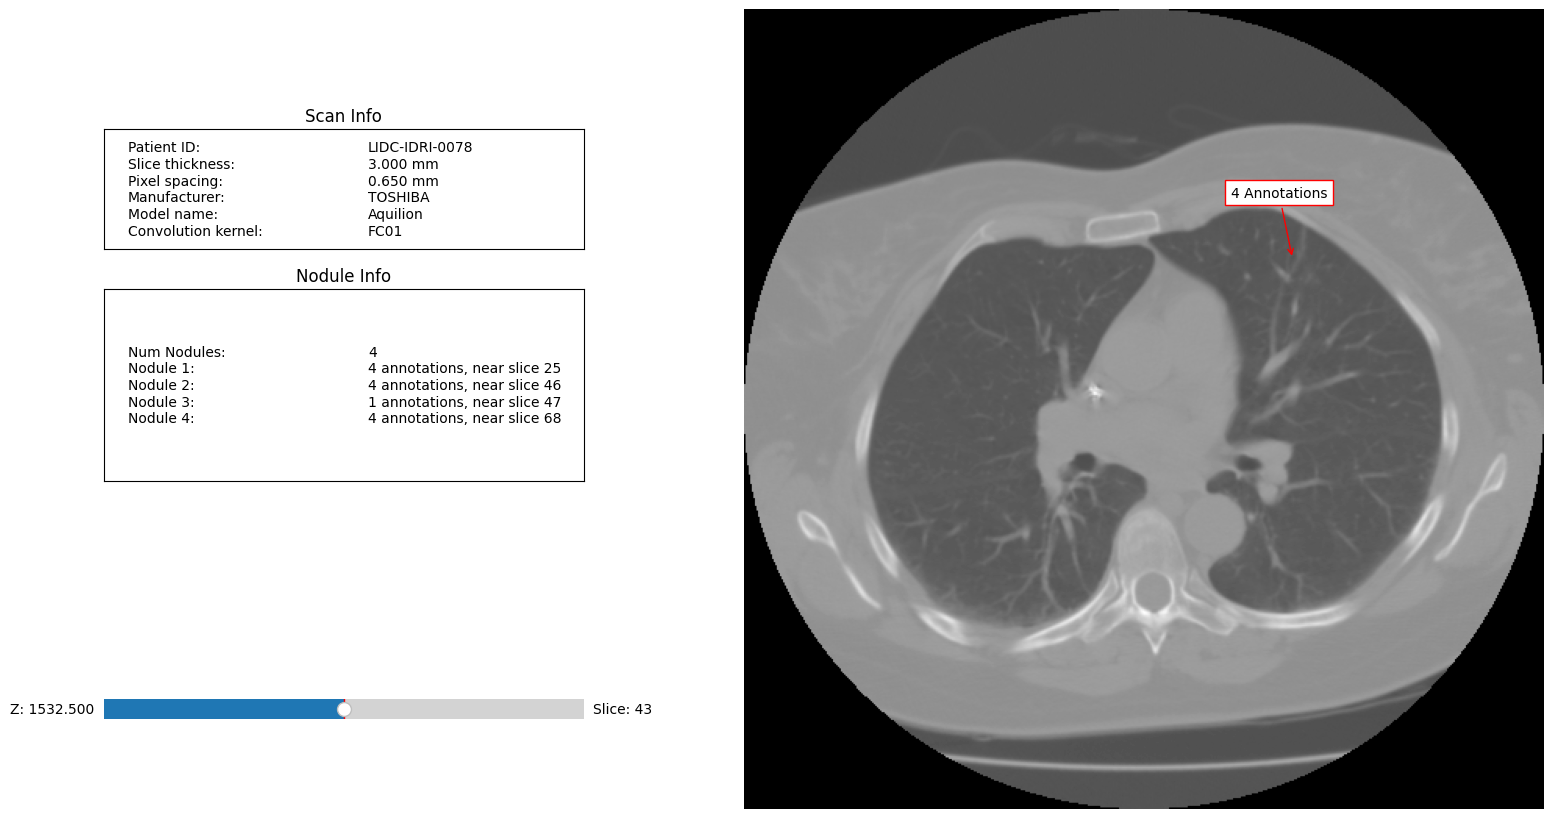

In [7]:
scan.visualize(annotation_groups=nods)

Tutorial Annotation Class 

In [8]:
ann=pl.query(pl.Annotation).first()
print(ann.scan.patient_id)

LIDC-IDRI-0078


In [9]:
anns=pl.query(pl.Annotation).filter(pl.Annotation.spiculation == 5,
                                    pl.Annotation.malignancy==5)

print(anns.count())


91


In [10]:
ann=pl.query(pl.Annotation)\
    .filter(pl.Annotation.malignancy==5).first()

print(f"Patient ID: {ann.scan.patient_id}")

print(ann.malignancy, ann.Malignancy)

print(ann.margin, ann.Margin)

Patient ID: LIDC-IDRI-0078
5 Highly Suspicious
2 Near Poorly Defined


In [11]:
pl.annotation_feature_names

('subtlety',
 'internalStructure',
 'calcification',
 'sphericity',
 'margin',
 'lobulation',
 'spiculation',
 'texture',
 'malignancy')

In [12]:
ann.print_formatted_feature_table()

Feature              Meaning                    # 
-                    -                          - 
Subtlety           | Obvious                  | 5 
Internalstructure  | Soft Tissue              | 1 
Calcification      | Absent                   | 6 
Sphericity         | Ovoid/Round              | 4 
Margin             | Near Poorly Defined      | 2 
Lobulation         | Near Marked Lobulation   | 4 
Spiculation        | No Spiculation           | 1 
Texture            | Solid                    | 5 
Malignancy         | Highly Suspicious        | 5 


In [13]:
svals=pl.query(pl.Annotation.spiculation)\
    .filter(pl.Annotation.spiculation>3)

print(all([s[0] > 3 for s in svals]))
print([s for s in svals])

True
[(4,), (4,), (4,), (4,), (5,), (5,), (5,), (5,), (5,), (4,), (4,), (4,), (4,), (4,), (4,), (5,), (5,), (5,), (4,), (5,), (4,), (5,), (5,), (5,), (5,), (4,), (5,), (5,), (5,), (5,), (5,), (5,), (4,), (5,), (5,), (5,), (5,), (5,), (5,), (4,), (5,), (5,), (5,), (5,), (5,), (5,), (4,), (4,), (5,), (4,), (4,), (4,), (4,), (5,), (5,), (5,), (5,), (4,), (4,), (4,), (4,), (5,), (4,), (4,), (5,), (5,), (5,), (5,), (5,), (4,), (4,), (4,), (4,), (5,), (4,), (4,), (4,), (4,), (5,), (5,), (5,), (4,), (4,), (5,), (4,), (5,), (5,), (5,), (5,), (5,), (5,), (5,), (4,), (4,), (4,), (5,), (5,), (5,), (5,), (4,), (4,), (5,), (4,), (5,), (4,), (5,), (4,), (4,), (4,), (5,), (5,), (4,), (4,), (5,), (4,), (5,), (5,), (5,), (5,), (5,), (4,), (4,), (5,), (5,), (4,), (4,), (5,), (5,), (4,), (5,), (5,), (4,), (5,), (4,), (4,), (5,), (5,), (4,), (4,), (5,), (5,), (5,), (5,), (5,), (4,), (5,), (4,), (5,), (5,), (4,), (5,), (5,), (4,), (4,), (4,), (5,), (4,), (4,), (4,), (4,), (4,), (5,), (4,), (4,), (4,), (5,)

In [60]:
ann=pl.query(pl.Annotation).first()
print(f"Patient ID: {ann.scan.patient_id}")

contours=ann.contours
print(contours[0])

Patient ID: LIDC-IDRI-0078
Contour(id=1,annotation_id=1)


In [15]:
print("%.2f mm, %.2f mm^2, %.2f mm^3" % (ann.diameter,
                                         ann.surface_area,
                                         ann.volume))

20.84 mm, 1124.13 mm^2, 2439.30 mm^3


In [16]:
mask = ann.boolean_mask()
print(mask.shape, mask.dtype)

(34, 27, 6) bool


In [75]:
bbox = ann.bbox()
print(bbox)

vol = ann.scan.to_volume()
print(vol[bbox].shape)

(slice(np.int64(151), np.int64(185), None), slice(np.int64(349), np.int64(376), None), slice(np.int64(44), np.int64(50), None))
Loading dicom files ... This may take a moment.
(34, 27, 6)


In [18]:
print(ann.bbox_dims())

[21.45 16.9  15.  ]


<function matplotlib.pyplot.show(close=None, block=None)>

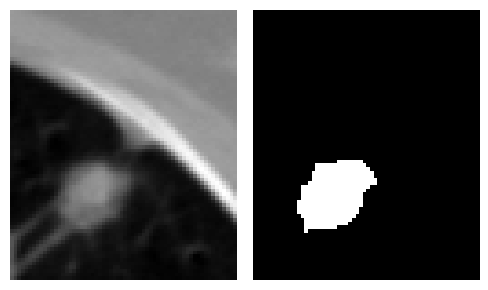

In [77]:
#Annotation Visualization

padding=[(30,10), (10,25), (0,0)]
mask=ann.boolean_mask(pad=padding)
bbox=ann.bbox(pad=padding)

fig,ax = plt.subplots(1,2,figsize=(5,3))

#the 4 in this line of code refers to the annotation that we are shoing so changin it would show dirent annotations, the bbox limits th images to only what is relevant to this annotation
ax[0].imshow(vol[bbox][:,:,4], cmap=plt.cm.gray)
ax[0].axis('off')

#the 4 in this line of code refers to the annotation that we are shoing so changin it would show dirent annotations
ax[1].imshow(mask[:,:,4], cmap=plt.cm.gray)
ax[1].axis('off')

plt.tight_layout()
plt.show

LIDC-IDRI-0078


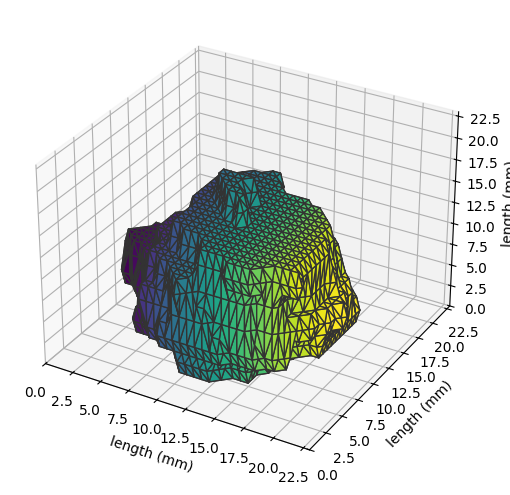

In [79]:
#Surface Visualization
ann=pl.query(pl.Annotation).filter(pl.Annotation.id == 1).first()
print(ann.scan.patient_id)
ann.visualize_in_3d()

LIDC-IDRI-0078
Loading dicom files ... This may take a moment.


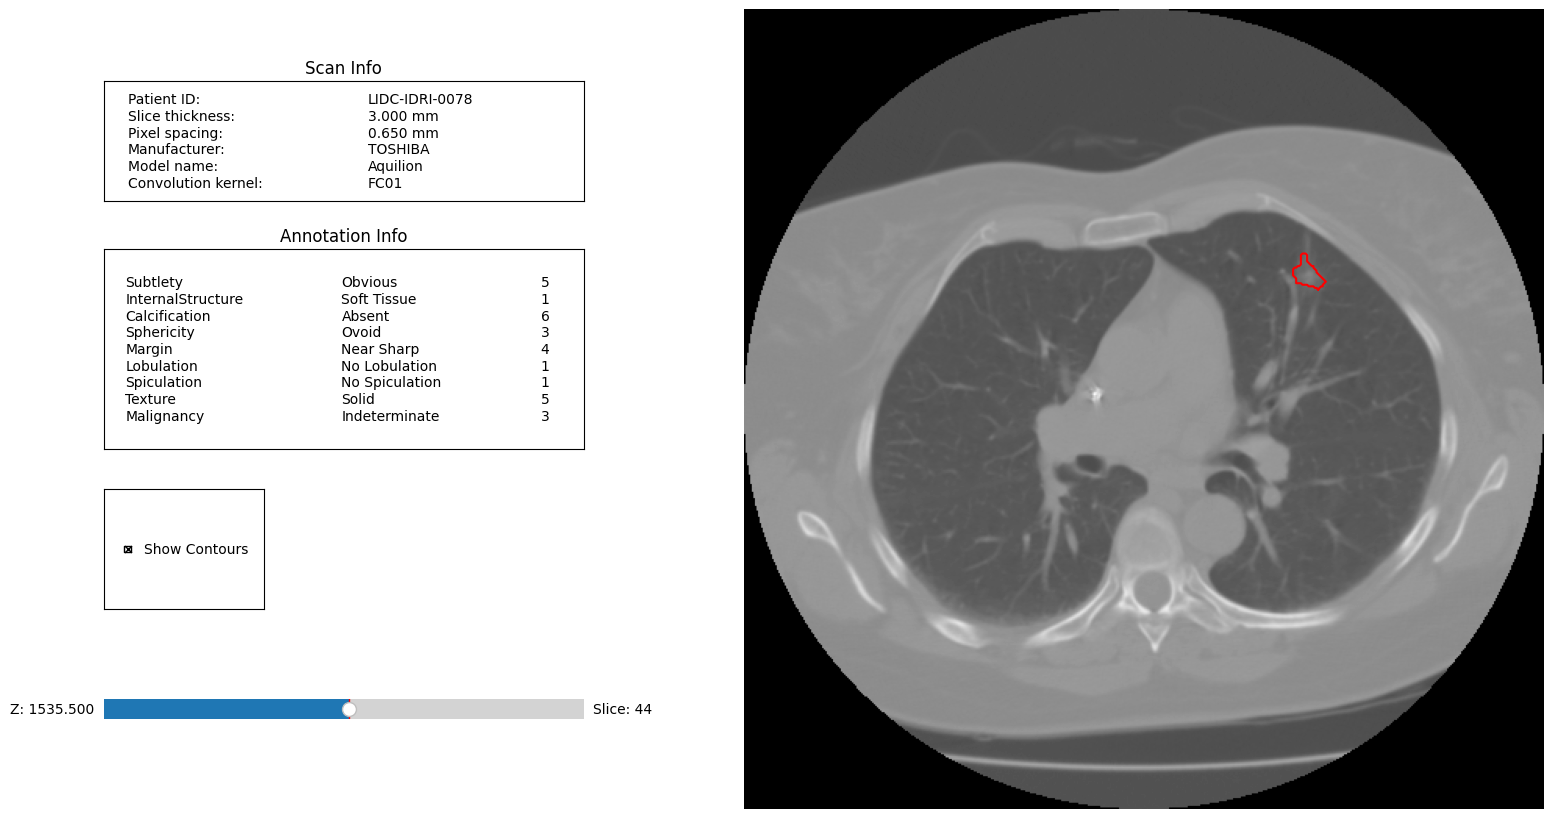

In [21]:
#CT visualization
ann=pl.query(pl.Annotation).first()
print(ann.scan.patient_id)
ann.visualize_in_scan()

Annotation Consensus tutorial

Loading dicom files ... This may take a moment.

Scan choosen belong to the patient LIDC-IDRI-0078
LIDC-IDRI-0078 has 4 nodules
Nodule 1 has 4 annotations.
Nodule 2 has 4 annotations.
Nodule 3 has 1 annotations.
Nodule 4 has 4 annotations.

The node being treated is the node 1


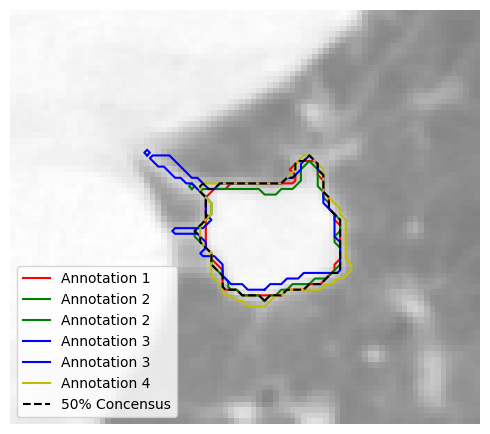

In [22]:
#Query for a scan, and convert it to an array volume
scan=pl.query(pl.Scan).filter(pl.Scan.patient_id=='LIDC-IDRI-0078').first()
vol=scan.to_volume()
print()
print(f"Scan choosen belong to the patient {scan.patient_id}")

#Cluster the annotations for the scan of the patient LIDC-IDRI-0078, then grab one
nods=scan.cluster_annotations()
print(f"{scan.patient_id} has {len(nods)} nodules")

for i,nod in enumerate(nods):
    print("Nodule %d has %d annotations." % (i+1, len(nods[i])))

print()
print("The node being treated is the node 1")
anns=nods[0]


# Perform a consensus consolidation and 50% agreement level
# We pad the slices to add context for viewing
cmask, cbbox, masks= consensus(anns, clevel=0.5, pad=[(20,20),(20,20),(0,0)])


#Get the central slice of the computed bounding box
k=int(0.5*(cbbox[2].stop - cbbox[2].start))


#Set up the plot
fig, ax=plt.subplots(1,1,figsize=(5,5))
ax.imshow(vol[cbbox][:,:,k], cmap=plt.cm.gray, alpha=0.5)


#Plot the annotation contours for the kth slice
colors = ['r', 'g', 'b', 'y']
for j in range(len (masks)):
    for c in find_contours(masks[j][:,:,k].astype(float),0.5):
        label="Annotation %d" %(j+1)
        plt.plot(c[:,1],c[:,0],colors[j], label=label)


#Plot the 50% consensus contour of the kth slice
for c in find_contours(cmask[:,:,k].astype(float), 0.5):
    plt.plot(c[:,1],c[:,0],'--k', label='50% Concensus')

ax.axis('off')
ax.legend()
plt.tight_layout()
plt.show()



Tests for the script responsible for creating the pandas DataFrame 

In [42]:
print(f"The scan id of the first annotation: {pl.query(pl.Annotation).first().scan_id}")
scan=pl.query(pl.Scan).filter(pl.Scan.id==pl.query(pl.Annotation).first().scan_id).all()
print(f"Number of scans with the same id: {len(scan)}")
print(f"This scan is from the pacient: {scan[0].patient_id}")


The scan id of the first annotation: 1
Number of scans with the same id: 1
This scan is from the pacient: LIDC-IDRI-0078
